# InfluxDB with Docker: A Hands-On Tutorial

## Introduction

**InfluxDB** is an open-source time series database designed for high-availability storage and real-time querying of time series data, which is commonly used in metrics, monitoring, and IoT applications.

In this tutorial, you will:
- Set up InfluxDB using Docker.
- Persist the InfluxDB configuration and data.
- Add points (data) to the database using the InfluxDB Python API.
- Query time series data using Python.
- Use the InfluxDB web interface for database management.

## Prerequisites

Ensure Docker is installed on your system. Follow the [Docker installation guide](https://docs.docker.com/get-docker/) if you need to set it up.

Ensure Python is installed, along with the `influxdb-client` library, which will be used to interact with InfluxDB.

Install the Python InfluxDB client:

In [1]:
!pip install influxdb-client

## Setting Up InfluxDB Using Docker

We'll set up InfluxDB using Docker, ensuring the configuration and data are persisted on the host machine.

### Persisting Configuration and Data

To persist InfluxDB data and configuration, we will use Docker volumes. Docker volumes allow data to be stored outside the container's filesystem, so it is not lost when the container is stopped or removed.

We’ll mount the volume:
- **`/var/lib/influxdb2`**: Where InfluxDB stores its data and configuration files.

### Creating the Volumes and Running the Container

We will use the following directory on the host machine to store the InfluxDB data and configuration:
- `./influxdb_data`

Let’s run the InfluxDB container with these volumes mounted.

In [2]:
import os

os.makedirs("influxdb_data", exist_ok=True)

# Get absolute path of the two directories
influxdb_data_dir = os.path.abspath("influxdb_data")

# Print them
print(influxdb_data_dir)

c:\work\github\IncubatorDTCourse\0-Pre-requisites\influxdb_data


Now we pull the docker image:

In [3]:
!docker pull influxdb:2.0

2.0: Pulling from library/influxdb
Digest: sha256:6dd9d3894e92c31ba25c59736d00871b46b960e40e65658bd8bd62825a53f88c
Status: Image is up to date for influxdb:2.0
docker.io/library/influxdb:2.0


This will download the latest InfluxDB 2.0 image, which includes the web interface.

### Run the InfluxDB Container

Now, let's run the InfluxDB container, exposing the necessary ports:
- **8086**: InfluxDB's HTTP API and web interface port.

In [4]:
# Run InfluxDB container with volumes for data and configuration persistence
!docker run -d --name influxdb \
    -p 8086:8086 \
    -v {influxdb_data_dir}:/var/lib/influxdb2 \
    influxdb:2.0

d528e746ab0e80a52b021298a027f5544d17072507427d77a55a42559b043ffd


This command will start InfluxDB in a Docker container.

### Explanation:
- **`-v {influxdb_data_dir}:/var/lib/influxdb2`**: This mounts the `./influxdb_data` directory on the host to the container’s data directory.
- **`-p 8086:8086`**: Exposes InfluxDB’s web interface and API on port 8086.


### Accessing the InfluxDB Web Interface

Once the container is running, you can access the InfluxDB web interface by opening your browser and navigating to:

http://localhost:8086

This is where you can manage databases, buckets (equivalent to databases), and explore the time series data.

Follow the get started page, and make sure to fill in the following details (if you change them, make sure to adjust code below):
1. Username: incubator
2. Password: incubator
3. Organization: incubator
4. Bucket: incubator
5. Then in the next page, press `Quick Start`
6. On the main page manu on the left, go to `Data->Tokens->incubator's Token`
7. Copy the token text. It should look like this:

In [5]:
token = "aPhc-IB1NglkQK3CC9ovRpnxLDDF_eIpavfrUXBuy8xKRsLxQnYxO6vU1_cPJM_vW12O3apdPPCeVpKB3dXX1Q=="

## Adding Data to InfluxDB Using Python

InfluxDB uses time series data, and you can add points to the database using the Python API. The data consists of measurements, tags (key-value pairs), and fields (data values) along with timestamps.

### Step 1: Initialize the Python Client

Import the required modules and initialize the InfluxDB client.

In [6]:
from datetime import datetime, timezone
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS
from random import random

# Replace these with your InfluxDB token, organization, and bucket
org = "incubator"
bucket = "incubator"

# Initialize the client
client = InfluxDBClient(url="http://localhost:8086", token=token, org=org)
write_api = client.write_api(write_options=SYNCHRONOUS)

### Step 2: Writing Points to the Database

You can write data points to InfluxDB using the `write_api`. Feel free to rerun the cell multiple times to create many points.

In [7]:
# Get timestamp for now in UTC
now = datetime.now(timezone.utc)

# Create a point with a measurement, tag, field, and a timestamp
point = Point("sensor_data") \
    .tag("source", "jupyter-notebook") \
    .field("temperature", random()) \
    .field("humidity", random()) \
    .time(now)

# Write the point to the bucket
write_api.write(bucket=bucket, org=org, record=point)

print("Data point written successfully.")

Data point written successfully.


### Explanation:
- **Measurement**: The name of the time series (e.g., `sensor_data`).
- **Tag**: Metadata associated with the point (e.g., `location`).
- **Field**: The actual data values (e.g., `temperature` and `humidity`).
- **Time**: The timestamp for the data point.

You can add more data points by adjusting the `Point` object.

### Step 3: Seeing new points in the web interface

Run the following cell to generate points. Then:
1. open http://localhost:8086 and go to Data Explorer. 
2. In the query locate the `sensor_data` for the 1st filter.
3. Then on the second filter, select `humidity` and `temperature`.
4. Then press submit.

You should see something like the following:
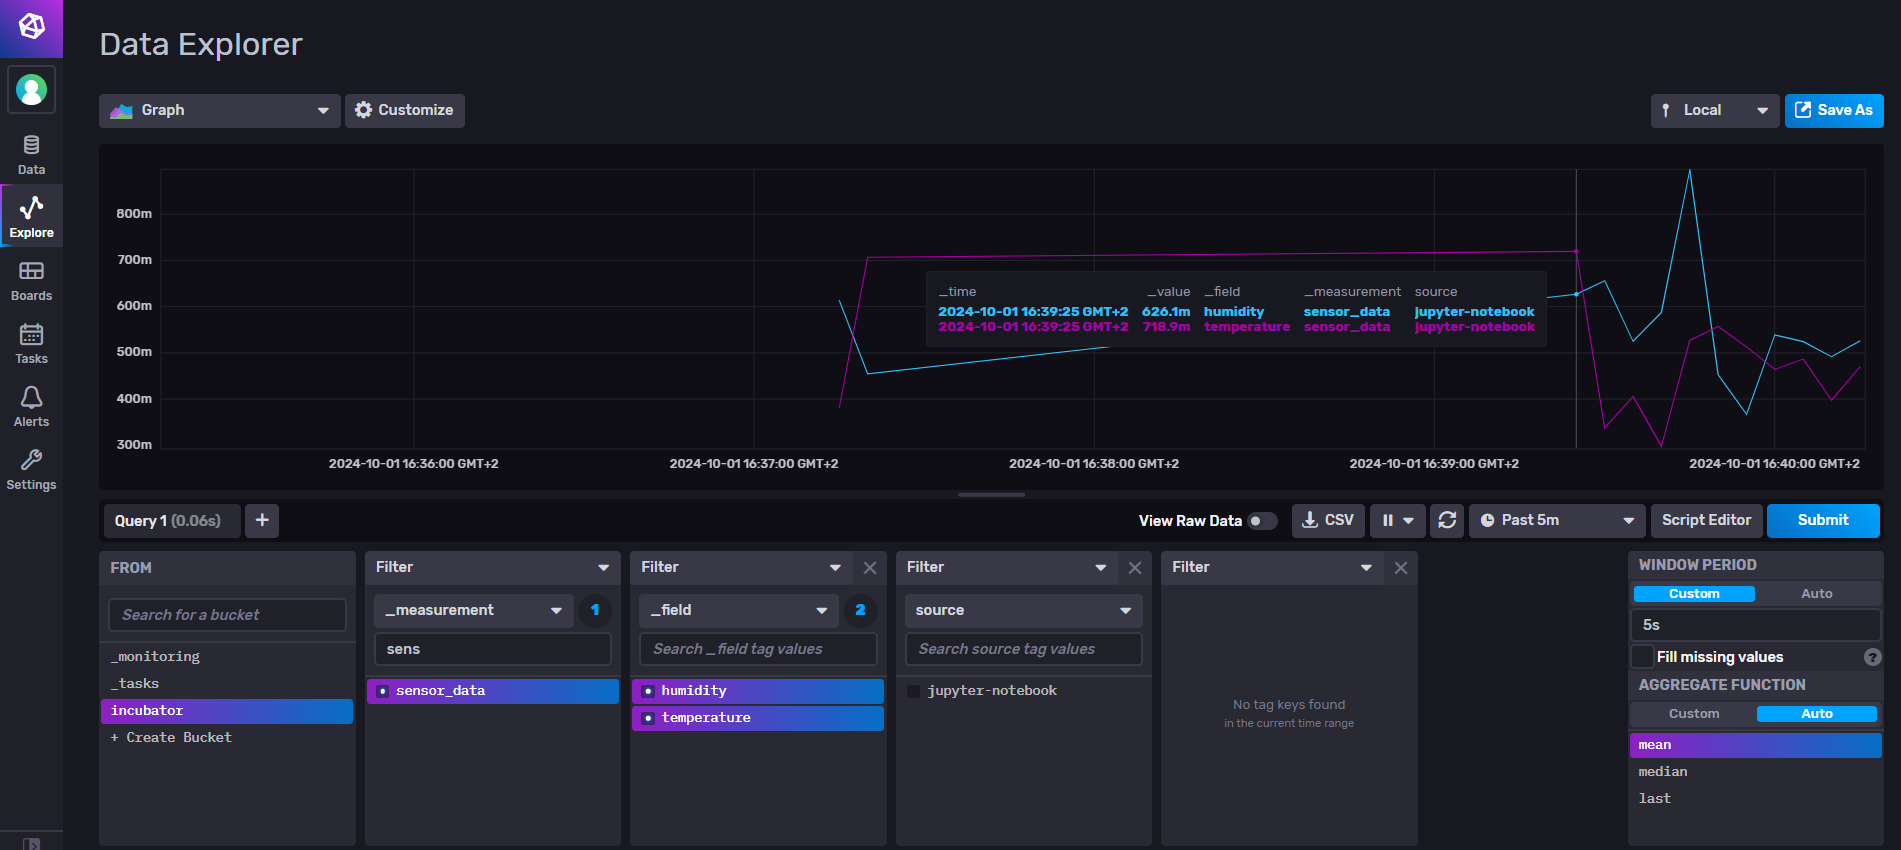

You can save that as a new dashboard if you wish.

In [8]:
from time import sleep

n = 100
while n>0:
    # Create a datapoint
    point = Point("sensor_data") \
    .tag("source", "jupyter-notebook") \
    .field("temperature", random()) \
    .field("humidity", random()) \
    .time(datetime.now(timezone.utc))

    # Send the point to DB
    write_api.write(bucket, org, point)

    print(point)

    sleep(1)
    n -= 1

sensor_data,source=jupyter-notebook humidity=0.5553197156242281,temperature=0.6315462167550464 1727794188318448000
sensor_data,source=jupyter-notebook humidity=0.10929668288128158,temperature=0.8322524716276832 1727794189365864000
sensor_data,source=jupyter-notebook humidity=0.774622790148504,temperature=0.614312622430421 1727794190417218000
sensor_data,source=jupyter-notebook humidity=0.5468823322882759,temperature=0.2020933400147139 1727794191467835000
sensor_data,source=jupyter-notebook humidity=0.7607544035084108,temperature=0.698981486287995 1727794192517809000
sensor_data,source=jupyter-notebook humidity=0.39161881531512255,temperature=0.38305359497378133 1727794193565390000
sensor_data,source=jupyter-notebook humidity=0.9572792081676303,temperature=0.9610968824908888 1727794194615134000
sensor_data,source=jupyter-notebook humidity=0.47872041065149173,temperature=0.31725168418163885 1727794195666052000
sensor_data,source=jupyter-notebook humidity=0.0807527465124529,temperature=0.

KeyboardInterrupt: 

## Querying Time Series Data Using Python

InfluxDB provides a powerful query language called **Flux**. Here's how you can query time series data using the Python API.

### Step 1: Create a Query

Let's query all temperature data from the `sensor_data` measurement for a specific location.

In [9]:
query = f'''
from(bucket: "{bucket}")
  |> range(start: -24h)
  |> filter(fn: (r) => r._measurement == "sensor_data")
  |> filter(fn: (r) => r._field == "temperature")
  |> filter(fn: (r) => r.source == "jupyter-notebook")
'''

This query fetches the temperature readings from the `sensor_data` measurement for the last 24 hours, filtered by the `source` tag.

### Step 2: Execute the Query

Execute the query using the `query_api` method.

In [10]:
query_api = client.query_api()

# Run the query and retrieve the results
tables = query_api.query(query)

# Print the results
for table in tables:
    for record in table.records:
        print(f'Time: {record.get_time()}, Temperature: {record.get_value()}')

Time: 2024-10-01 14:37:11.580061+00:00, Temperature: 0.21780771996457227
Time: 2024-10-01 14:37:13.696655+00:00, Temperature: 0.8867563307364136
Time: 2024-10-01 14:37:14.150756+00:00, Temperature: 0.4397342147708003
Time: 2024-10-01 14:37:14.523692+00:00, Temperature: 0.20038880901616507
Time: 2024-10-01 14:37:14.763275+00:00, Temperature: 0.5123321957709377
Time: 2024-10-01 14:37:14.960500+00:00, Temperature: 0.02361290181895004
Time: 2024-10-01 14:37:15.179641+00:00, Temperature: 0.6379425555282005
Time: 2024-10-01 14:37:15.370551+00:00, Temperature: 0.8332064997082691
Time: 2024-10-01 14:37:15.559831+00:00, Temperature: 0.793458437298022
Time: 2024-10-01 14:37:15.745613+00:00, Temperature: 0.5597871371008186
Time: 2024-10-01 14:39:23.229150+00:00, Temperature: 0.6436274599610461
Time: 2024-10-01 14:39:24.278558+00:00, Temperature: 0.7942124340760562
Time: 2024-10-01 14:39:25.327971+00:00, Temperature: 0.1415985924570542
Time: 2024-10-01 14:39:26.377125+00:00, Temperature: 0.0831851

This code will print all the temperature readings from the last 24 hours, along with their timestamps.


## Stopping and Removing the InfluxDB Docker Container

When you’re done, you can stop and remove the InfluxDB container to free up resources. Since we've persisted the configuration and data using Docker volumes, these will remain intact even after removing the container.

In [11]:
!docker stop influxdb
!docker rm influxdb

influxdb
influxdb


The data and configuration will remain in the `./influxdb_data` directory on your host machine, so you can restart the container later and continue where you left off.

If you wish to wipe out the database, simply delete the shared folder and recreated it as in the previous instructions.